Before getting started, let's walk through ten examples where statistical methods are used in an applied machine learning project:

Problem Framing: Requires the use of exploratory data analysis and data mining.

Data Understanding: Requires the use of summary statistics and data visualization.

Data Cleaning: Requires the use of outlier detection, imputation and more.

Data Selection: Requires the use of data sampling and feature selection methods.

Data Preparation: Requires the use of data transforms, scaling, encoding and much more.

Model Evaluation: Requires experimental design and resampling methods.

Model Configuration: Requires the use of statistical hypothesis tests and estimation statistics.

Model Selection: Requires the use of statistical hypothesis tests and estimation statistics.

Model Presentation: Requires the use of estimation statistics such as confidence intervals.

Model Predictions: Requires the use of estimation statistics such as prediction intervals

In this class, we will study:

    Introduction to Statistics and its types
    Statistics for data preparation
    Statistics for model evaluation
    Gaussian and Descriptive stats
    Variable correlation
    Non-parametric Statistics


#### Introduction to Statistics and its types:

It is a branch of mathematics dealing with the collection, analysis, interpretation, and presentation of masses of numerical data.

It has 2 types:
Descriptive statistics
Inferential statistics

    Descriptive Statistics: Descriptive statistics are used to describe the essential features of the data in a study. They provide simple summaries about the sample and the measures. Together with simple graphics analysis, they form the basis of virtually every quantitative analysis of data.
    
    Inferential Statistics: Inferential statistics are methods that help in quantifying properties of the domain or population from a tinier set of obtained observations called a sample

#### Statistics for data preparation:

Statistical methods are required in the development of train and test data for your machine learning model.

This includes techniques for:

    Outlier detection
    Missing value imputation
    Data sampling
    Data scaling
    Variable encoding


1. Outlier detection: 

An outlier is considered an observation that appears to deviate from other observations in the sample
Many machine learning algorithms are sensitive to the range and distribution of attribute values in the input data. Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately more mediocre results.

Identification of potential outliers is vital for the following reasons:

An outlier could indicate the data is bad. In example, the data maybe coded incorrectly, or the experiment did not run correctly. If it can be determined that an outlying point is, in fact, erroneous, then the value that is outlying should be removed from the analysis. If it is possible to correct that is another option

In a few cases, it may not be possible to determine whether an outlying point is a bad data point. Outliers could be due to random variation or could possibly indicate something scientifically interesting. In any event, you typically do not want to just delete the outlying observation. However, if the data contains significant outliers, you may need to consider the use of robust statistical techniques.


2. Missing value imputation:

Most of the datasets now suffer from the problem of missing values. Your machine learning model may not get trained effectively if the data that you are feeding to the model contains missing values. Statistical tools and techniques come here for the rescue.

Many people tend to discard the data instances which contain a missing value. But that is not a good practice because during that course you may lose essential features/representations of the data. Although there are advanced methods for dealing with missing value problems, these are the quick techniques that one would go for: Mean Imputation and Median Imputation.

3. Data sampling:

Data is considered the currency of applied machine learning. Therefore, its collection and usage both are equally significant.

Data sampling refers to statistical methods for selecting observations from the domain with the objective of estimating a population parameter. In other words, sampling is an active process of gathering observations with the intent of estimating a population variable.

Each row of a dataset represents an observation that is indicative of a particular population. When working with data, you often do not have access to all possible observations. This could be for many reasons, for example:

    It may be difficult or expensive to make more observations.
    It may be challenging to gather all the observations together.
    More observations are expected to be made in the future.

Many times, you will not have the right proportion of the data samples. So, you will have to under-sample or over-sample based on the type of problem.

You perform under-sampling when the data samples for a particular category are very high compared to other meaning you discard some of the data samples from the category where they are higher. You perform over-sampling when the data samples for a particular type are decidedly lower compared to the other. In this case, you generate data samples.

This applies to multi-class scenarios as well.

Statistical sampling is a large field of study, but in applied machine learning, there may be three types of sampling that you are likely to use: simple random sampling, systematic sampling, and stratified sampling.


    Simple Random Sampling: Samples are drawn with a uniform probability from the domain.
    Systematic Sampling: Samples are drawn using a pre-specified pattern, such as at intervals.
    Stratified Sampling: Samples are drawn within pre-specified categories (i.e., strata).

4. Data Scaling:

Often, the features of your dataset may widely vary in ranges. Some features may have a scale of 0 to 100 while the other may have ranges of 0.01 - 0.001, 10000- 20000, etc.

This is very problematic for efficient modeling. Because a small change in the feature which has a lower value range than the other feature may not have a significant impact on those other features. It affects the process of good learning. Dealing with this problem is known as data scaling.

There are different data scaling techniques such as Min-Max scaling, Absolute scaling, Standard scaling, etc.

5. Variable encoding:

At times, your datasets contain a mixture of both numeric and non-numeric data. Many machine learning frameworks like scikit-learn expect all the data to be present in all numeric format. This is also helpful to speed up the computation process.

Techniques like Label encoding, One-Hot encoding, etc. are used to convert non-numeric data to numeric.

#### Outlier detection:
    
You will use the Z-Score index to detect outliers, and for this, you will investigate the Boston House Price dataset. Let's start off by importing the dataset from sklearn's utilities, and as you go along, you will start the necessary concepts.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
#seperate the features form the target

x = boston.data
y = boston.target

To view the dataset in a standard tabular format with the all the feature names, you will convert this into a pandas dataframe

In [5]:
# Take the columns separately in a variable
columns = boston.feature_names

# Create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


It is a common practice to start with univariate outlier analysis where you consider just one feature at a time. Often, a simple box-plot of a particular feature can give you good starting point. You will make a box-plot using seaborn and you will use the DIS feature.

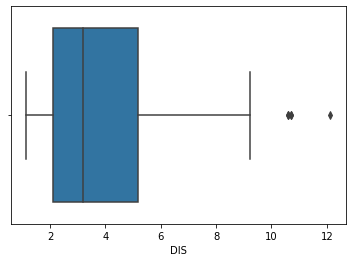

In [7]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

import matplotlib.pyplot as plt
plt.show()

To view the box-plot, you did the second import of matplotlib since seaborn plots are displayed like ordinary matplotlib plots.

The above plot shows three points between 10 to 12, these are outliers as they're are not included in the box of other observations. Here you analyzed univariate outlier, i.e., you used DIS feature only to check for the outliers.

Let's proceed with Z-Score now

"The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured."

The idea behind Z-score is to describe any data point regarding their relationship with the Standard Deviation and Mean for the group of data points. Z-score is about finding the distribution of data where the mean is 0, and the standard deviation is 1, i.e., normal distribution.

Well, while calculating the Z-score you re-scale and center the data (mean of 0 and standard deviation of 1) and look for the instances which are too far from zero. These data points that are way too far from zero are treated as the outliers. In most common cases the threshold of 3 or -3 is used. In example, say the Z-score value is greater than or less than 3 or -3 respectively. This data point will then be identified as an outlier

You will use the Z-score function defined in scipy library to detect the outliers

In [10]:
from scipy import stats

z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


It is not possible to detect the outliers by just looking at the above output. You will define the threshold for yourself, and you will use a simple condition for detecting the outliers that cross your threshold

In [11]:
threshold = 3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

The first array contains the list of row numbers and the second array contains their respective column numbers. For example, z[55][1] have a Z-score higher than 3

In [12]:
print(z[55][1])

3.375038763517309


So, the 55th record on column ZN is an outlier

You saw how you could use Z-Score and set its threshold to detect potential outliers in the data

#### Missing value imputation

We will use the famous Pima Indian Diabetes dataset which is known to have missing values. from https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

In [13]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header=None)
print(data.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

Now, this dataset is known to have missing values, but for your first glance at the above statistics, it might appear that the dataset does not contain missing values at all. But if you take a closer look, you will find that there are some columns where a zero value is entirely invalid. These are the values that are missing.

Specifically, the below columns have an invalid zero value as the minimum:

    Plasma glucose concentration
    Diastolic blood pressure
    Triceps skinfold thickness
    2-Hour serum insulin
    Body mass index

Let's confirm this by looking at the raw data, the example prints the first 20 rows of data

In [14]:
data.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Clearly there are 0 values in the columns 2, 3, 4, and 5.

As this dataset has missing values denoted as 0, so it might be tricky to handle it by just using the conventional means. 

Let's summarize the approach you will follow to combat this:

    Get the count of zeros in each of the columns you saw earlier.
    Determine which columns have the most zero values from the previous step.
    Replace the zero values in those columns with NaN.
    Check if the NaNs are getting appropriately reflected.
    Call the fillna() function with the imputation strategy.


In [15]:
# Step 1: Get the count of zeros in each of the columns
print((data[[1,2,3,4,5]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


You can see that columns 1,2 and 5 have just a few zero values, whereas columns 3 and 4 show a lot more, nearly half of the rows

In [16]:
#step2: mark zero values as missing  or NaN

data[[1,2,3,4,5]] = data[[1,2,3,4,5]].replace(0,np.NaN)

In [17]:
#Count the number of NaN values in each column

print(data.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [18]:
#step 4: 
data.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Now, you will impute the missing values using Mean Imputation which is essentially imputing the mean of the respective column in place of missing values

In [20]:
#step 5: call the fillna() function with the imputation strategy

data.fillna(data.mean(), inplace = True)

#Count the number of NaN values in each column to verify
print(data.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [24]:
#Now check the data
data.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


#### Datascaling

#### Preprocessing in Data Science (Part 1): Centering, Scaling, and KNN

Lets look at the importance of preprocessing in the machine learning pipeline by examining how centering and scaling can improve model performance.

Data preprocessing is an umbrella term that covers an array of operations data scientists will use to get their data into a form more appropriate for what they want to do with it. For example, before performing sentiment analysis of twitter data, you may want to strip out any html tags, white spaces, expand abbreviations and split the tweets into lists of the words they contain. When analyzing spatial data you may scale it so that it is unit-independent, that is, so that your algorithm doesn't care whether the original measurements were in miles or centimeters

we will use example  of scaling numerical data (numerical data: data consisting of numbers, as opposed to categories/strings; scaling: using basic arithmetic to change the range of the data; more details to follow) to demonstrate the importance of considering preprocessing as part of a greater structure, the machine learning (ML) pipeline

We will use at one of the simplest algorithms for classification tasks, the k-Nearest Neighbors algorithm.

##### k-Nearest Neighbors for classification in machine learning

Let's say that we have some labeled data, for example, data that consists of characteristics of red wine (e.g. alcohol content, density, amount of citric acid, pH, etc...; these are the predictor variables) with target variable 'Quality' and labels 'good' & 'bad'. Then, given the characteristics of a new, unlabeled wine, the classification task is to predict its 'Quality'. When all the predictor variables are numerical (there are also ways to deal with the categorical case), we can consider each row/wine as a point in n-dimensional space and, in this case, k-Nearest Neighbors (k-NN) is a conceptually & computationally simple classification method: for each new, unlabeled wine, we calculate, for some integer k, its k nearest neighbors in the n-dimensional predictor variable space. Then we look at the labels of these k neighbors (i.e. 'good' or 'bad') & assign the label with the most hits to the new wine (e.g. if k = 5, 3 neighbors vote 'good' and 2 vote 'bad', then our model labels the new wine 'good'). Note that, here, training the model consists entirely in storing the data points: there are no parameters to fit!

we'll check out the wine quality dataset: we'll import it into a pandas dataframe and then plot histograms of the predictor variables to get a feel for the data.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')

df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


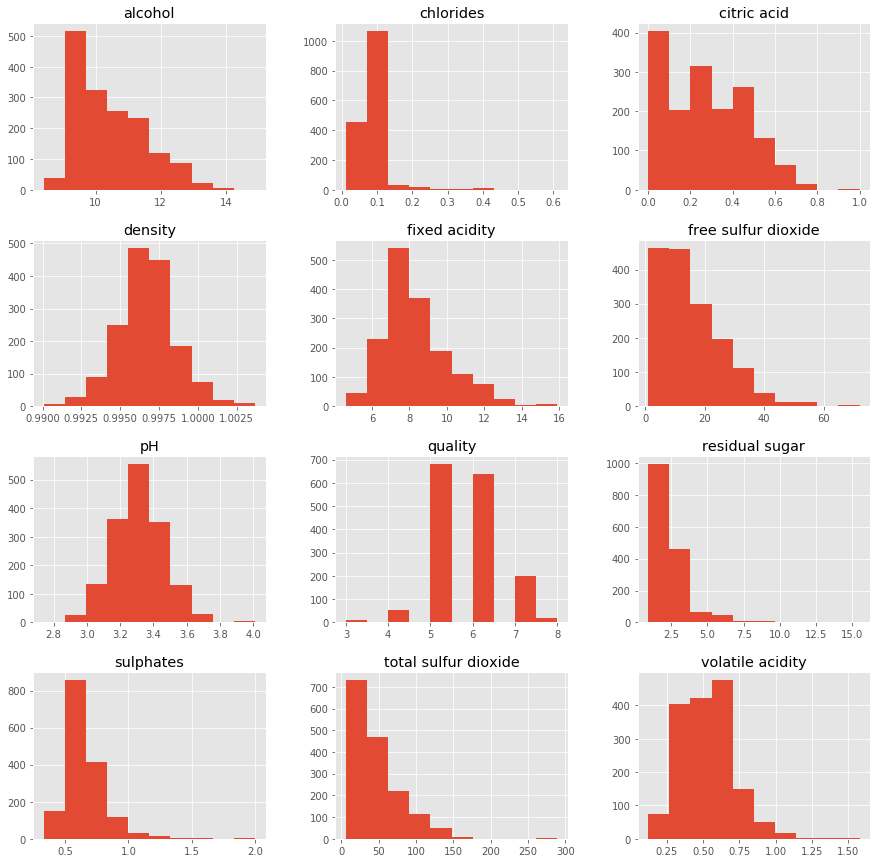

In [49]:
X = df.drop('quality' , 1).values # drop target variable
y1 = df['quality'].values
pd.DataFrame.hist(df, figsize = [15,15]);

First notice the range of the predictor variables: 'free sulfur dioxide' ranges from 0 to ~70 and 'volatile acidity' from ~0 to ~1.2. More specifically, the former has a range 2 orders of magnitude larger than that of the latter. Any algorithm, such as k-NN, which cares about the distance between data points, may thus focus squarely and unfairly on variables with a larger range, such as 'free sulfur dioxide', a variable that may contain only noise, for all we know. This motivates scaling our data

Now the target variable is a 'Quality' rating of wine and ranges from 3 to 8. For the purpose of expositional ease, let's turn it into a two-category variable consisting of 'good' (rating > 5) & 'bad' (rating <= 5). We'll also plot histograms of both formulations of the target variable to get a sense of what's going on.

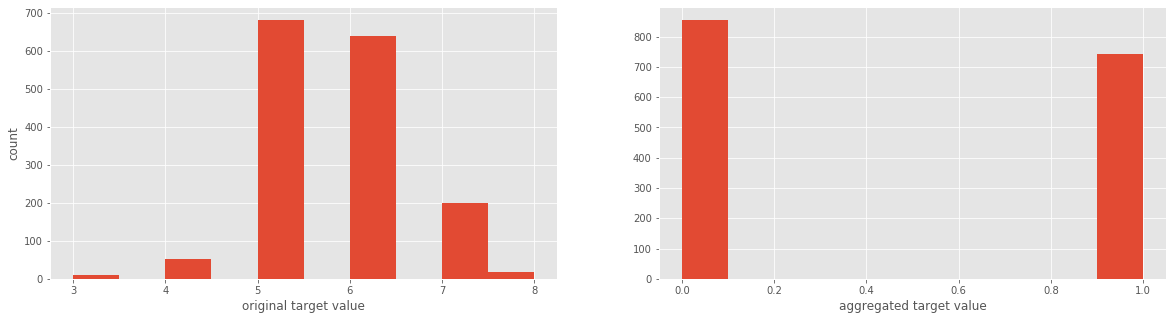

In [53]:
y = y1 <= 5 # is the rating <= 5?

y=y.astype(np.float32)


# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y1)
plt.xlabel('original target value')

plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

Now we're nearly ready to perform k-Nearest Neighbors. First off, though, if we're going to compare how our model performs with and without preprocessing, we'll need to figure out how to measure the 'goodness' of a model:

#### k-Nearest Neighbors: how well does it perform?

There are a number of performance measures for classification challenges. It is of the utmost importance to realise that the choice of performance measure is deeply domain & question specific. In the case of a dataset with balanced classes (where all target values are ~ equally represented), data scientists commonly look at accuracy as a performance measure. In fact, as we'll see, accuracy is the default scoring method for both k-Nearest Neighbors and logistic regression in scikit-learn

Accuracy = Number of Correct Predictions / Total Number of Predictions

#### k-Nearest Neighbors: performance in practice and the train test split

It is all well and good to have a measure of performance such as accuracy, but if we fit the model on all of the data we have, what dataset are we going we going to report the accuracy from? Remember that we want a model that generalizes well to new data. Thus, if we train our model on a dataset D, reporting the accuracy of the model on the same data D may make it look as though it performs better than it actually does. This is known as overfitting. To combat this issue, data scientists will commonly train their model on a subset of the data, called the training set and evaluate its performance on the rest of the data, the test set. This is precisely what we're going to do here! A general rule of thumb is to use approximately 80% of the data for training & 20% for test. Let's now split our red wine quality data:

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We now build the k-NN model, make predictions on the test set and compare these predictions to the ground truth in order to get a measure of model performance:

In [56]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.612500


It is worth reiterating that the default scoring method for k-NN in scikit-learn is accuracy. An accuracy of 61% is not great but for an out of the box model without any preprocessing it's not horrible either. To check out a variety of other metrics, we can use scikit-learn's classification report also:

In [57]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65       179
         1.0       0.56      0.57      0.57       141

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



Now we're going to introduce scaling and centering, the most basic methods of preprocessing numerical data, and see if and how they effect our model performance.

#### The mechanics of preprocessing: scaling and centering

Before running a model, such as regression (predicting a continuous variable) or classification (predicting a discrete variable), on data, you almost always want to do some preprocessing. For numerical variables, it is common to either normalize or standardize your data

All normalization means is scaling a dataset so that its minimum is 0 and its maximum 1. To achieve this we transform each data point x to

    xnormalized = (x-xmin)/(xmax-xmin)

Stardardization is slightly different; it's job is to center the data around 0 and to scale with respect to the standard deviation:

    xstandardized = (x−μ) / σ,
    
    where μ and σ are the mean and standard deviation of the dataset, respectively. First note that these transformations merely change the range of the data and not the distribution. You may later wish to use any other number of transforms, such as a log transform or a Box-Cox transform, to make your data look more Gaussian (like a bell-curve).

#### Preprocessing: scaling in practice

Here below I (i) scale the data, (ii) use k-Nearest Neighbors and (iii) check the model performance.
We will use scikit-learn's scale function, which standardizes all features (columns) in the array passed to it.

In [59]:
from sklearn.preprocessing import scale
Xs = scale(X)

from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

knn_model_2 = knn.fit(Xs_train, y_train)

print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))

y_true, y_pred = y_test, knn_model_2.predict(Xs_test)

print(classification_report(y_true, y_pred))

k-NN score for test set: 0.712500
k-NN score for training set: 0.814699
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       179
         1.0       0.70      0.62      0.65       141

    accuracy                           0.71       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.71      0.71      0.71       320



All these measures improved by 0.1, which is a 16% improvement and significant! As hinted at above, before scaling there were a number of predictor variables with ranges of different order of magnitudes, meaning that one or two of them could dominate in the context of an algorithm such as k-NN. The two main reasons for scaling your data are


    Your predictor variables may have significantly different ranges and, in certain situations, such as when implementing k-NN, this needs to be mitigated so that certain features do not dominate the algorithm;
    
    You want your features to be unit-independent, that is, not reliant on the scale of the measurement involved: for example, you could have a measured feature expressed in meters and I could have the same feature expressed in centimeters. If we both scale our respective data, this feature will be the same for each of us.




Supervised learning: The task of inferring a target variable from predictor variables. For example, inferring the target variable 'presence of heart disease' from predictor variables such as 'age', 'sex', and 'smoker status'.

Classification task: A supervised learning task is a classification task if the target variable consists of categories (e.g. 'click' or 'not', 'malignant' or 'benign' tumour).

Regression task: A supervised learning task is a regression task if the target variable is a continuously varying variable (e.g. price of a house) or an ordered categorical variable such as 'quality rating of wine'.

k-Nearest Neighbors: An algorithm for classification tasks, in which a data point is assigned the label decided by a majority vote of its k nearest neighbors.

Preprocessing: Any number of operations data scientists will use to get their data into a form more appropriate for what they want to do with it. For example, before performing sentiment analysis of twitter data, you may want to strip out any html tags, white spaces, expand abbreviations and split the tweets into lists of the words they contain.

Centering and Scaling: These are both forms of preprocessing numerical data, that is, data consisting of numbers, as opposed to categories or strings, for example; centering a variable is subtracting the mean of the variable from each data point so that the new variable's mean is 0; scaling a variable is multiplying each data point by a constant in order to alter the range of the data. See the body of the article for the importance of these, along with examples.
